In [159]:
import os
import re
from typing import List, Dict, Union

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats, signal

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Загрузка данных

In [2]:
os.makedirs('data', exist_ok=True)

In [3]:
!unzip /content/ident_lab1.zip -d 'data'

Archive:  /content/ident_lab1.zip
  inflating: data/zad11_data.csv     
  inflating: data/zad12_data.csv     
  inflating: data/zad31_data.csv     
  inflating: data/zad22_data.csv     
  inflating: data/zad21_data.csv     
  inflating: data/zad32_data.csv     


In [7]:
DATA_DIR = '/content/data'

In [8]:
def load_data(
    task_number: int,
    data_dir = DATA_DIR,
) -> List[pd.DataFrame]:
    pattern = re.compile(rf'.*zad{task_number}\d_data\.csv')
    all_files = [os.path.join(data_dir, file_name) for file_name in os.listdir(data_dir) if file_name.endswith('.csv')]
    return [pd.read_csv(file_path) for file_path in all_files if pattern.match(file_path)]

# Задание 1

In [10]:
TASK_NUMBER = 1
df1, df2 = load_data(task_number=TASK_NUMBER)

In [11]:
display(df1.sample(5))
display(df2.sample(5))

,y,x1,x2,x3
637,-86.059626,-2.316053,2.520259,13.565832
166,23.113625,3.331829,0.801257,-1.193048
751,-78.996611,-0.914918,5.672999,14.771012
308,-8.416766,-2.520742,-1.470320,0.187477
811,-94.542315,2.652681,5.270115,17.695136


,y,x1,x2,x3
932,-77.614753,-0.015657,4.270426,13.732660
150,8.876557,2.878441,-1.467560,-1.206002
170,11.242636,3.399202,-0.965467,-1.225015
675,-73.141526,-3.456223,3.731074,11.763264
700,-74.367074,-3.280593,5.063100,12.343887


In [248]:
X = df1.drop('y', axis=1)
y = df1['y']

In [24]:
# reg = LinearRegression().fit(X, y)

In [249]:
np.linalg.det(X.T @ X)

np.float64(1806503003204.6038)

In [250]:
theta = np.linalg.inv(X.T @ X) @ X.T @ y
theta = theta.values.reshape(-1,1)

In [251]:
theta

array([[ 2.00453767],
       [ 3.83637446],
       [-6.73394495]])

In [252]:
y_approx = (X @ theta).values[:, 0]

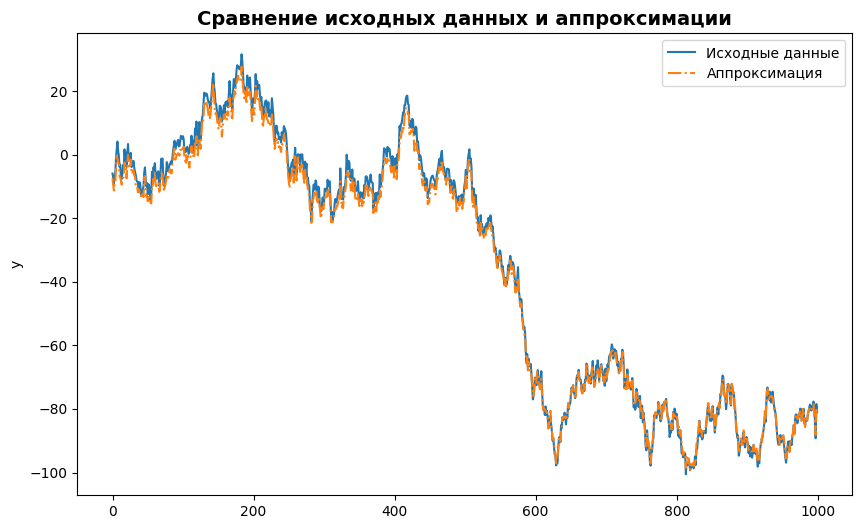

In [253]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df1.y, label='Исходные данные', ax=ax)
sns.lineplot(data=y_approx, label='Аппроксимация', ax=ax, linestyle='-.')
ax.legend()
ax.set_title('Сравнение исходных данных и аппроксимации',  fontsize=14, fontweight='bold')
plt.show()

In [254]:
err = df1.y - y_approx

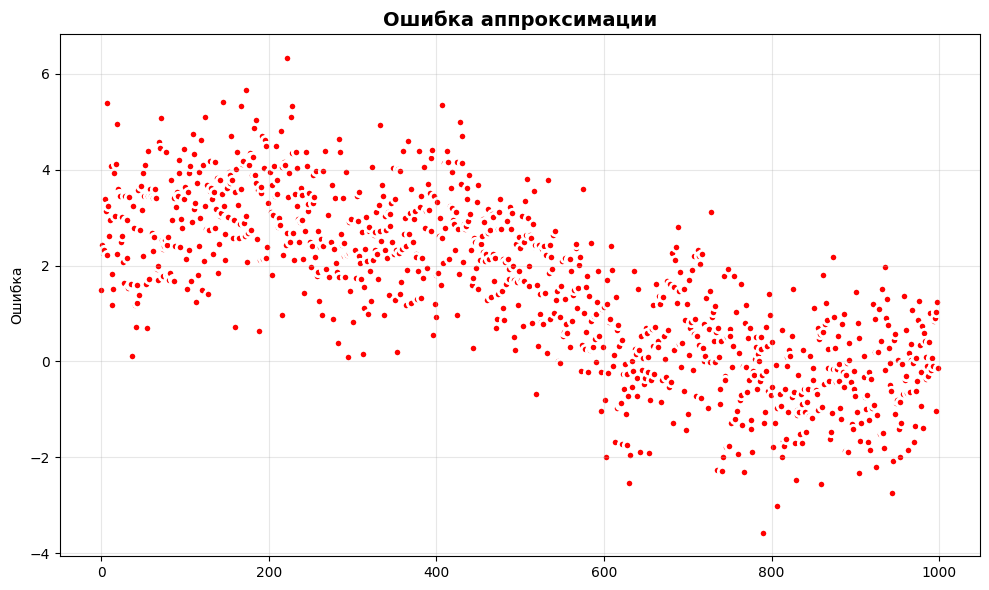

In [255]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(err, ax=ax, color='red', linewidth=2)
ax.set_title('Ошибка аппроксимации', fontsize=14, fontweight='bold')
ax.set_ylabel('Ошибка')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show();


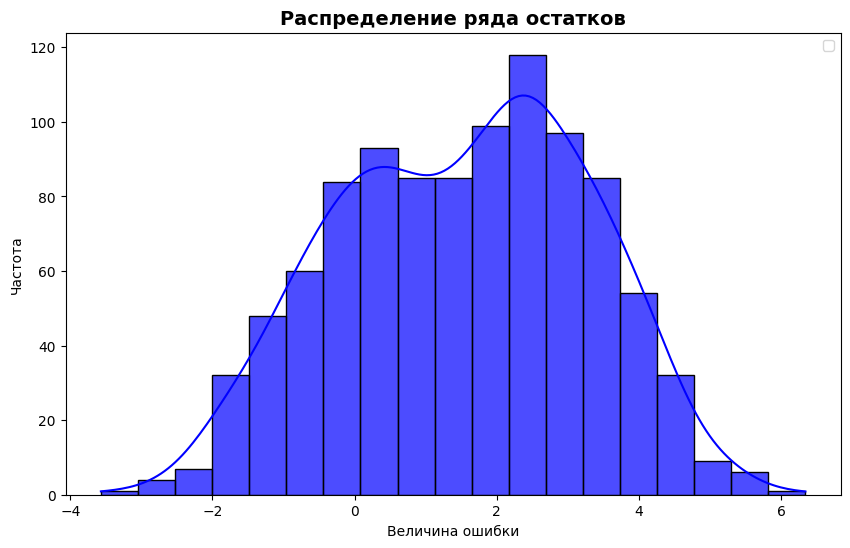

In [256]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(err, ax=ax, kde=True, color='blue', alpha=0.7)
ax.set_title('Распределение ряда остатков', fontsize=14, fontweight='bold')
ax.set_xlabel('Величина ошибки')
ax.set_ylabel('Частота')
ax.legend();

In [257]:
print(f"Среднее значение ряда остатков: {err.mean()}")
print(f"Стандартное отклонение ряда остатков: {err.std()}")

Среднее значение ряда остатков: 1.5182454363184452
Стандартное отклонение ряда остатков: 1.7583882624028468


### Гетероскедостичность (тест Бройша — Пагана)

In [258]:
X_const = sm.add_constant(X)
bp_test = sms.het_breuschpagan(err, X_const)
lm_stat, lm_pvalue, f_stat, f_pvalue = bp_test
print("p_value:", lm_pvalue)

p_value: 8.416991027002785e-95


мда, треш

Проверим еще и равенство среднего нулю (чтобы пойти на..)

In [259]:
t_stat, p_value = stats.ttest_1samp(err, popmean=0)
print(f"t-статистика: {t_stat:.4f}")
print(f"p-значение: {p_value:.4f}")

t-статистика: 27.3041
p-значение: 0.0000


"радуемся" дважды


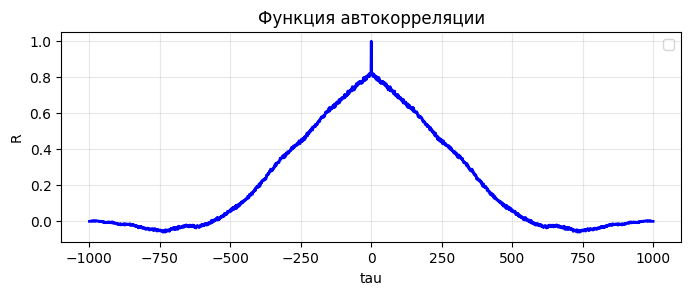

In [260]:
autocorr = signal.correlate(err, err, mode='full')
autocorr = autocorr / autocorr.max()

lags = signal.correlation_lags(len(err), len(err), mode='full')
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(lags, autocorr, 'b-', linewidth=2)
plt.xlabel('tau')
plt.ylabel('R')
plt.title('Функция автокорреляции')
plt.grid(True, alpha=0.3)
plt.legend();

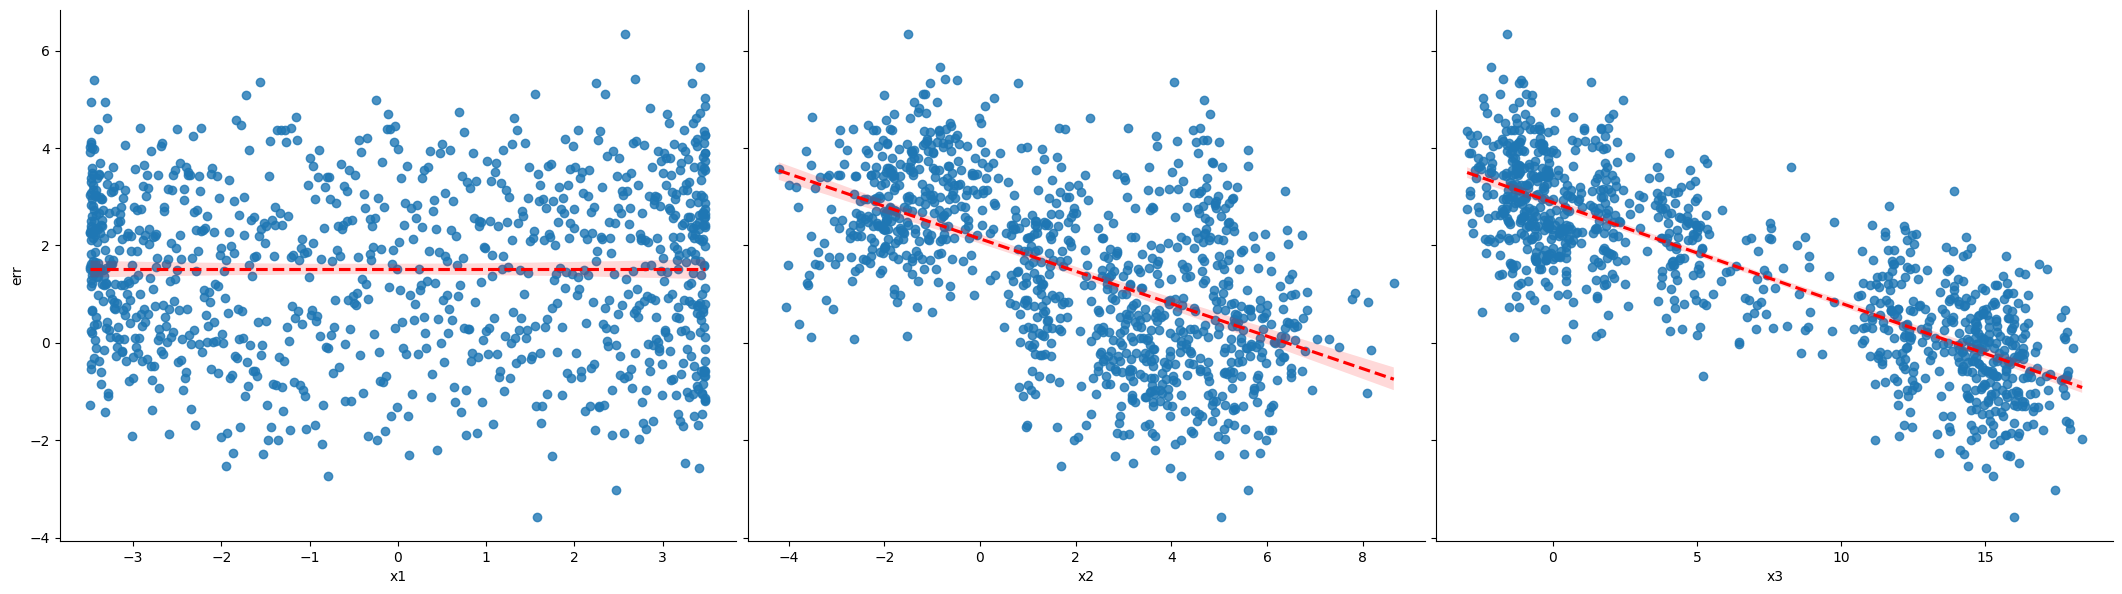

In [263]:
df_plot = X.copy()
df_plot['err'] = err

sns.pairplot(
    df_plot,
    y_vars=['err'],
    x_vars=X.columns,
    kind='reg',
    plot_kws={'line_kws': {'color': 'red', 'linestyle': '--'}},
    height=6,
    aspect=1.2
);

## df2

In [264]:
X = df2.drop('y', axis=1)
y = df2['y']

theta = np.linalg.inv(X.T @ X) @ X.T @ y
theta = theta.values.reshape(-1,1)

y_approx = (X @ theta).values[:, 0]

err = df1.y - y_approx

In [265]:
print(theta)

[[ 2.02321462]
 [ 3.99025128]
 [-6.99650756]]


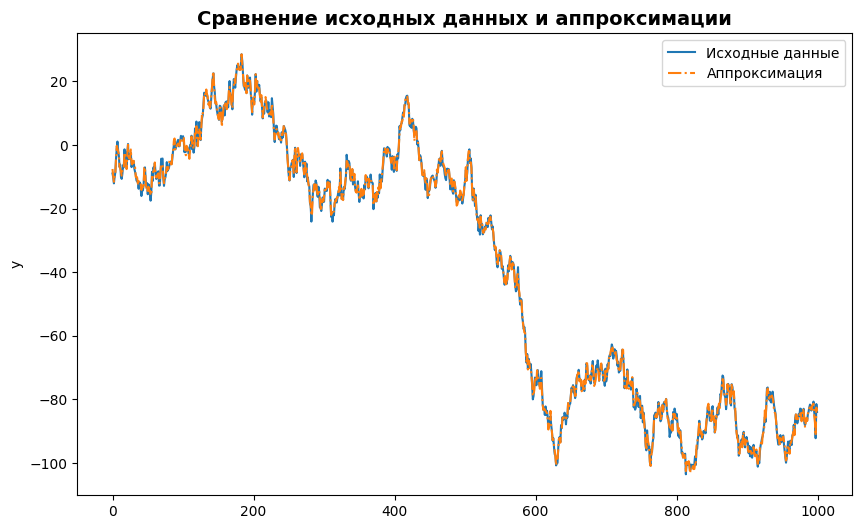

In [267]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df2.y, label='Исходные данные', ax=ax)
sns.lineplot(data=y_approx, label='Аппроксимация', ax=ax, linestyle='-.')
ax.legend()
ax.set_title('Сравнение исходных данных и аппроксимации',  fontsize=14, fontweight='bold')
plt.show()

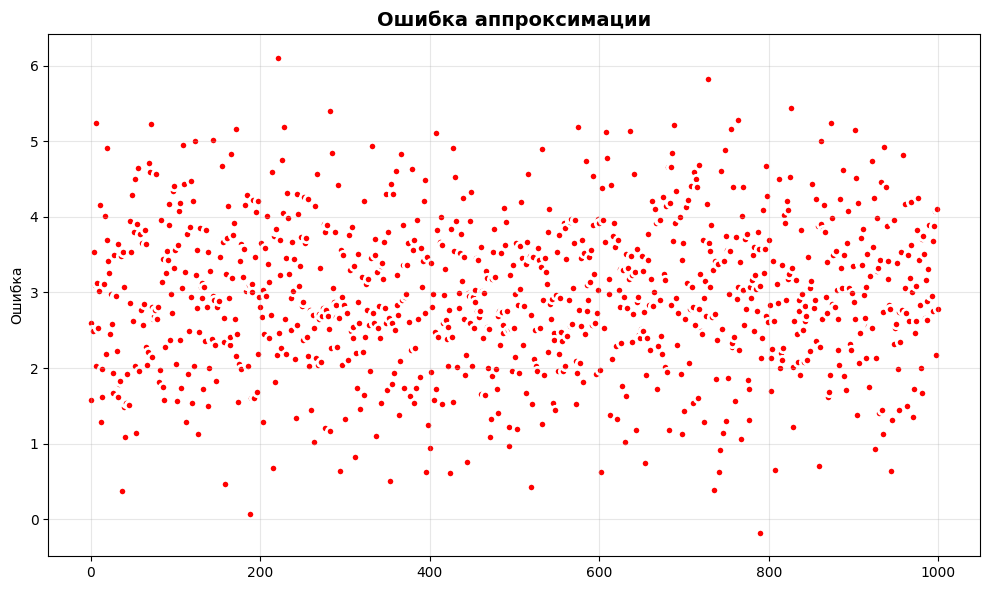

In [225]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(err, ax=ax, color='red', linewidth=2)
ax.set_title('Ошибка аппроксимации', fontsize=14, fontweight='bold')
ax.set_ylabel('Ошибка')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show();


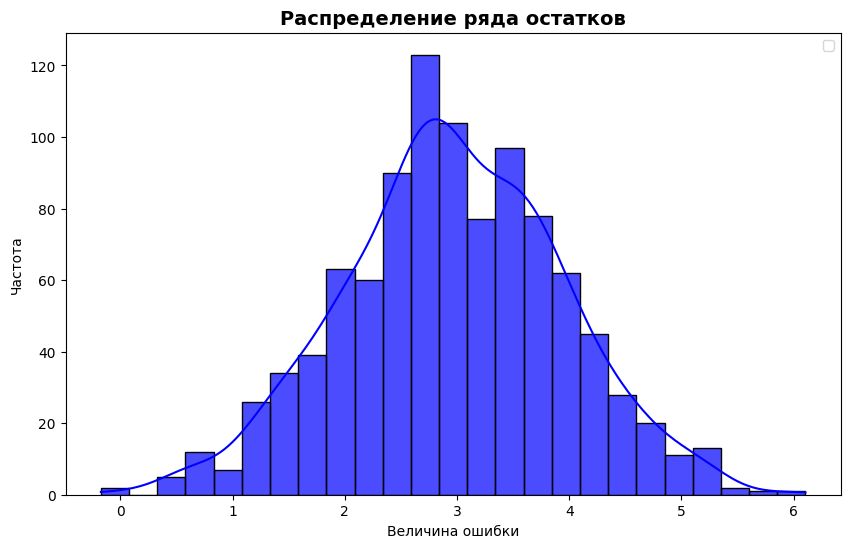

In [226]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(err, ax=ax, kde=True, color='blue', alpha=0.7)
ax.set_title('Распределение ряда остатков', fontsize=14, fontweight='bold')
ax.set_xlabel('Величина ошибки')
ax.set_ylabel('Частота')
ax.legend();

In [227]:
X_const = sm.add_constant(X)
bp_test = sms.het_breuschpagan(err, X_const)
lm_stat, lm_pvalue, f_stat, f_pvalue = bp_test
print("p_value:", lm_pvalue)

p_value: 0.7160978863293954


In [228]:
t_stat, p_value = stats.ttest_1samp(err, popmean=0)
print(f"t-статистика: {t_stat:.4f}")
print(f"p-значение: {p_value:.4f}")

t-статистика: 96.0546
p-значение: 0.0000


In [229]:
print(f"Среднее значение ряда остатков: {err.mean()}")
print(f"Стандартное отклонение ряда остатков: {err.std()}")

Среднее значение ряда остатков: 2.962499071627579
Стандартное отклонение ряда остатков: 0.9753040200067221


In [230]:
autocorr = signal.correlate(err, err, mode='full')
autocorr = autocorr / autocorr.max()

lags = signal.correlation_lags(len(err), len(err), mode='full')

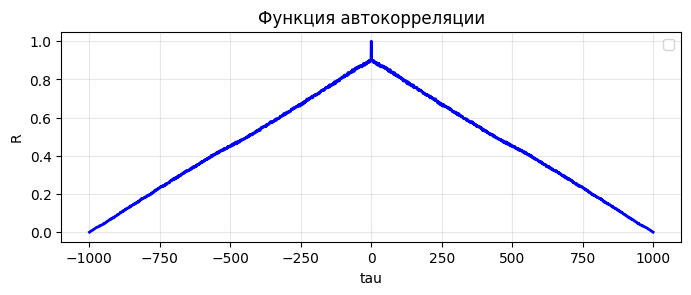

In [231]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(lags, autocorr, 'b-', linewidth=2)
plt.xlabel('tau')
plt.ylabel('R')
plt.title('Функция автокорреляции')
plt.grid(True, alpha=0.3)
plt.legend();

In [235]:
X

,x1,x2,x3
0,-3.344385,-0.157438,0.020348
1,-3.362227,0.043447,0.453394
2,-3.378874,0.200999,0.789217
3,-3.394321,0.268690,0.534443
4,-3.408562,0.116652,0.389374
...,...,...,...
995,-3.237492,7.778484,15.642868
996,-3.261204,7.833021,15.985477
997,-3.283756,8.084145,16.722966
998,-3.305143,8.651007,15.780275


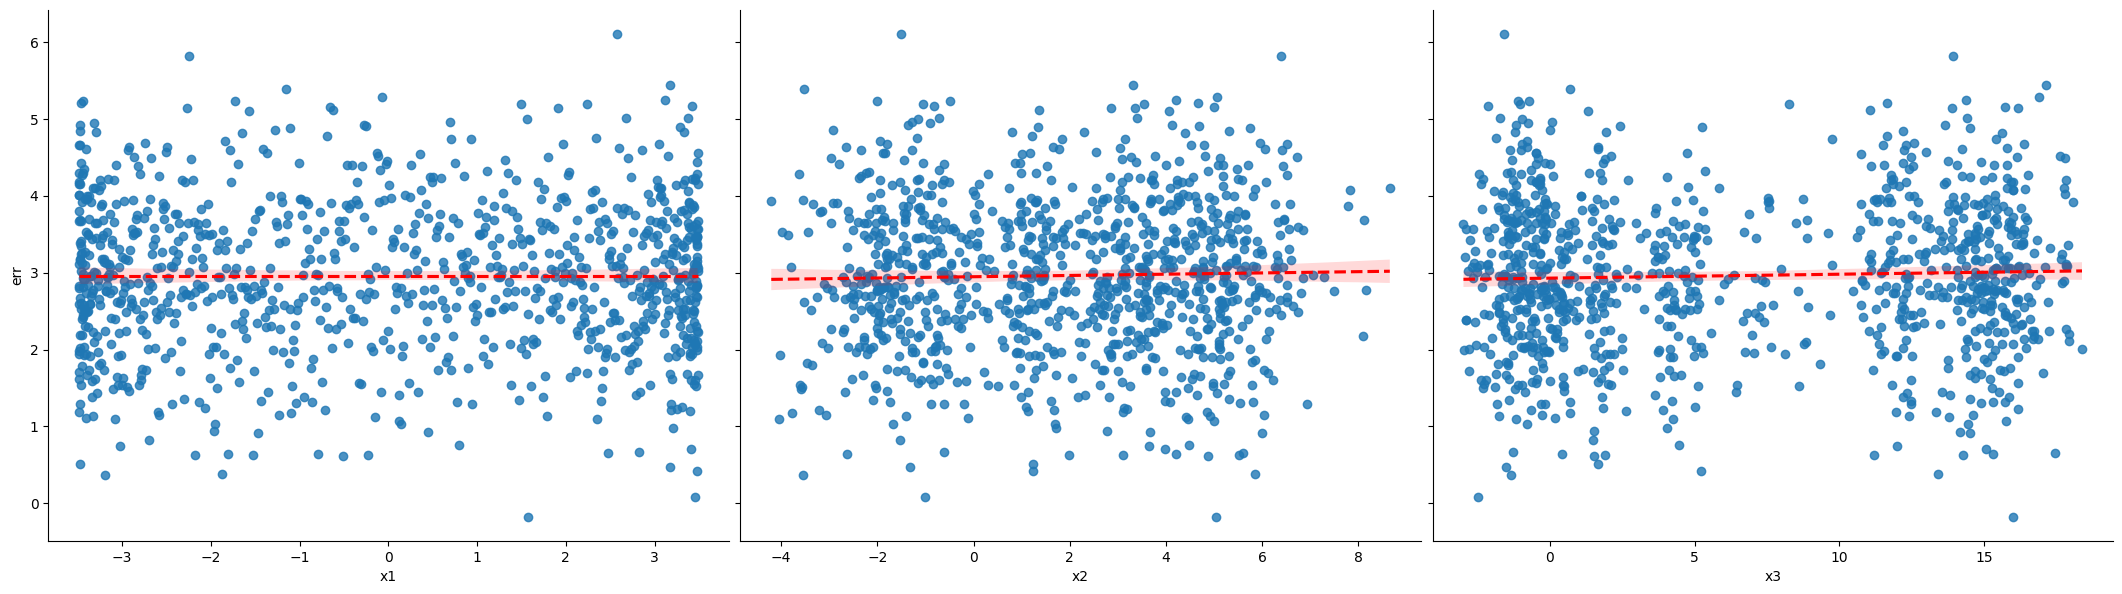

In [247]:
df_plot = X.copy()
df_plot['err'] = err

sns.pairplot(
    df_plot,
    y_vars=['err'],
    x_vars=X.columns,
    kind='reg',
    plot_kws={'line_kws': {'color': 'red', 'linestyle': '--'}},
    height=6,
    aspect=1.2
)